In [1]:
#**Installations to set up Scanpy environment.**

!pip install scanpy
!pip install anndata
!pip3 install igraph
!pip install celltypist
!pip install decoupler
!pip install fa2-modified

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.3/172.3 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.1/284.1 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 50.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 71.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 106.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 61.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.9/120.9 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━

In [37]:
import scanpy as sc
import anndata as ad
import pandas as pd
import decoupler as dc

In [3]:
!wget https://media.githubusercontent.com/media/josoga2/sc/refs/heads/main/bone_marrow.h5ad

--2025-12-02 17:14:17--  https://media.githubusercontent.com/media/josoga2/sc/refs/heads/main/bone_marrow.h5ad
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 354509549 (338M) [application/octet-stream]
Saving to: ‘bone_marrow.h5ad’

bone_marrow.h5ad    100%[===================>] 338.09M  41.1MB/s    in 8.2s    

2025-12-02 17:14:26 (41.1 MB/s) - ‘bone_marrow.h5ad’ saved [354509549/354509549]



In [42]:
#Load pre-processed count matrix (cells x genes)
bone_marrow_adata = sc.read_h5ad("/content/bone_marrow.h5ad")
print(bone_marrow_adata)

# Exploration of dataset (shape of the anndata)
bone_marrow_adata.shape

# Exploration of dataset (first five genes in the anndata)
bone_marrow_adata.var.head()

# Exploration of dataset(first five cell data)
bone_marrow_adata.obs.head()

# Exploration of dataset
bone_marrow_adata.to_df()

AnnData object with n_obs × n_vars = 14783 × 17374
    obs: 'disease stage', 'treatment', 'timepoint', 'Dataset', 'sample', 'disease_original', 'disease_general', 'COVID-19 Condition', 'Lineage', 'Cell.group', 'Cell.class_reannotated', 'n_genes', 'n_counts', 'percent_mito', 'tissue_original', 'tissue_ontology_term_id', 'disease_ontology_term_id', 'donor_id', 'development_stage_ontology_term_id', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'suspension_type', 'tissue_type', 'assay', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'n_cells', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'citation', 'doi', 'organism', 'organism_ontology_term_id', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_pca', 'X_tsne', 'X_umap'


,ENSG00000161920,ENSG00000122335,ENSG00000175548,ENSG00000100330,ENSG00000176340,ENSG00000179846,ENSG00000204860,ENSG00000172260,ENSG00000141424,ENSG00000164512,...,ENSG00000164114,ENSG00000151702,ENSG00000224578,ENSG00000138756,ENSG00000111052,ENSG00000176946,ENSG00000150456,ENSG00000284934,ENSG00000261842,ENSG00000260456
index,,,,,,,,,,,,,,,,,,,,,
Guo-AAACCTGAGAGCTTCT-2,0.0,0.000000,0.0,0.0,9.436466,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-AAACCTGAGAGGTTGC-7,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,8.817776,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-AAACCTGAGATACACA-3,0.0,8.651494,0.0,0.0,8.651494,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-AAACCTGAGCGATTCT-1,0.0,0.000000,0.0,0.0,8.858533,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-AAACCTGAGTGAAGAG-3,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Guo-TTTGTCAGTTTCGCTC-4,0.0,0.000000,0.0,0.0,8.389465,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-TTTGTCATCAGAGACG-7,0.0,0.000000,0.0,0.0,9.931639,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-TTTGTCATCAGATAAG-4,0.0,0.000000,0.0,0.0,10.009642,0.0,0.0,0.0,0.000000,0.0,...,0.0,9.01104,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
##Ensure unique gene and cell names (required by Scanpy)
bone_marrow_adata.var_names_make_unique()
bone_marrow_adata.obs_names_make_unique()

In [7]:
###Mitochondrial genes: MT- prefix (human-style)
bone_marrow_adata.var['MT'] = bone_marrow_adata.var_names.str.startswith("MT-")

###Ribosomal: RPS* and RPL*
bone_marrow_adata.var['RIBO'] = bone_marrow_adata.var_names.str.startswith(("RPS", "RPL"))

 ###Haemoglobin: selected known genes
hb_gene_list = ['HBA1', 'HBA2', 'HBB', 'HBD', 'HBG1', 'HBG2']
# Convert var_names to uppercase for case-insensitive comparison with hb_gene_list
sym_upper = bone_marrow_adata.var_names.str.upper()
# Set 'HB' to True for genes whose uppercase names are in hb_gene_list
bone_marrow_adata.var['HB'] = sym_upper.isin(hb_gene_list)

In [8]:
##Calculating QC metrics
sc.pp.calculate_qc_metrics(
    bone_marrow_adata, qc_vars=["MT", 'RIBO', 'HB'], inplace=True, log1p=True
)
bone_marrow_adata.obs.head()

bone_marrow_adata.var.head()

#3. Cell-level QC metrics & filtering
#To remove low-quality cells and outliers (likely doublets / dying cells) before downstream analysis.



,n_cells,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length,feature_type,MT,RIBO,HB,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts
ENSG00000161920,927,False,MED11,NCBITaxon:9606,gene,754,protein_coding,False,False,False,885,0.502831,0.407351,94.013394,7433.353516,8.913867
ENSG00000122335,429,False,SERAC1,NCBITaxon:9606,gene,2683,protein_coding,False,False,False,405,0.231814,0.208488,97.260367,3426.911377,8.139707
ENSG00000175548,149,False,ALG10B,NCBITaxon:9606,gene,1773,protein_coding,False,False,False,142,0.082084,0.078889,99.039437,1213.443970,7.102042
ENSG00000100330,426,False,MTMR3,NCBITaxon:9606,gene,634,protein_coding,False,False,False,404,0.227307,0.204822,97.267131,3360.278564,8.120077
ENSG00000176340,7171,False,COX8A,NCBITaxon:9606,gene,494,protein_coding,False,False,False,6898,4.277597,1.663471,53.338294,63235.750000,11.054641


In [9]:
# Basic gene/cell filters
sc.pp.filter_cells(bone_marrow_adata, min_genes=200)
sc.pp.filter_genes(bone_marrow_adata, min_cells=3)

# Mito threshold (tune based on plots)
bone_marrow_adata = bone_marrow_adata[bone_marrow_adata.obs['pct_counts_MT'] < 20, :].copy()

bone_marrow_adata = bone_marrow_adata[bone_marrow_adata.obs['pct_counts_RIBO'] < 20, :].copy()

bone_marrow_adata = bone_marrow_adata[bone_marrow_adata.obs['pct_counts_HB'] < 20, :].copy()

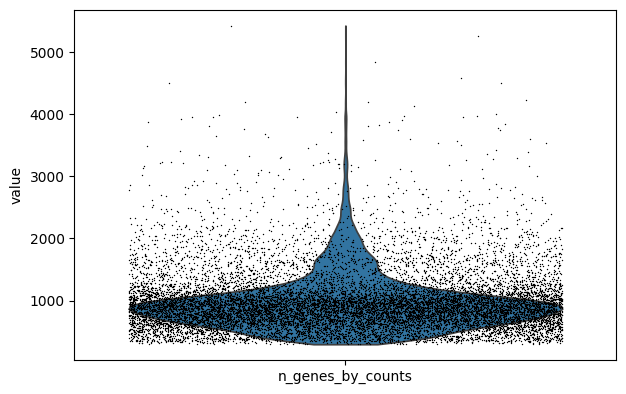

In [10]:
sc.pl.violin(
    bone_marrow_adata,
    ["n_genes_by_counts"],
    jitter=0.4,
    multi_panel=False,
)


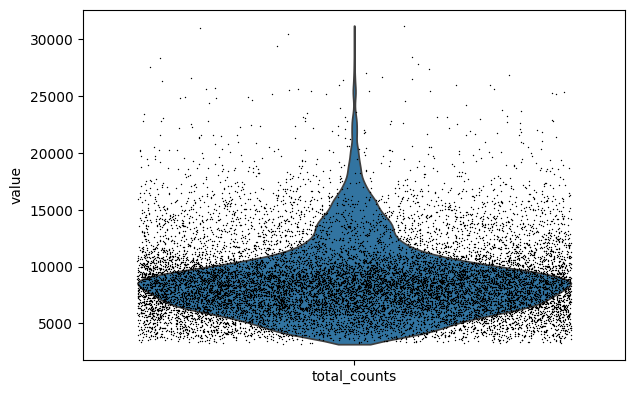

In [11]:
#Total number of molecules (UMI) detected in cell.
sc.pl.violin(
    bone_marrow_adata,
    ["total_counts"],
    jitter=0.4,
    multi_panel=False,
)


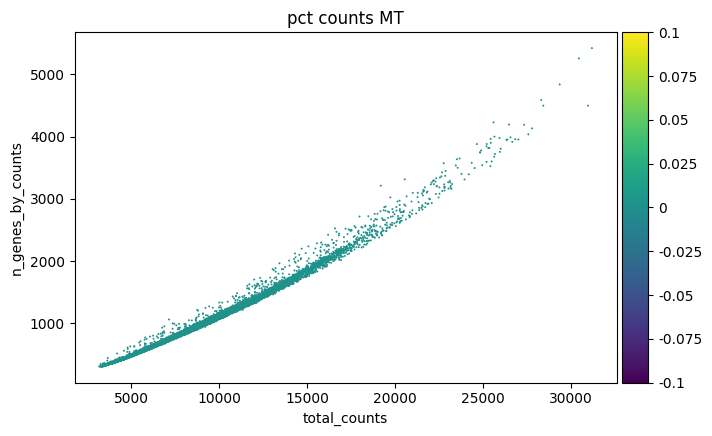

In [12]:
#Visualization of mt genes
sc.pl.scatter(bone_marrow_adata, "total_counts", "n_genes_by_counts", color="pct_counts_MT")

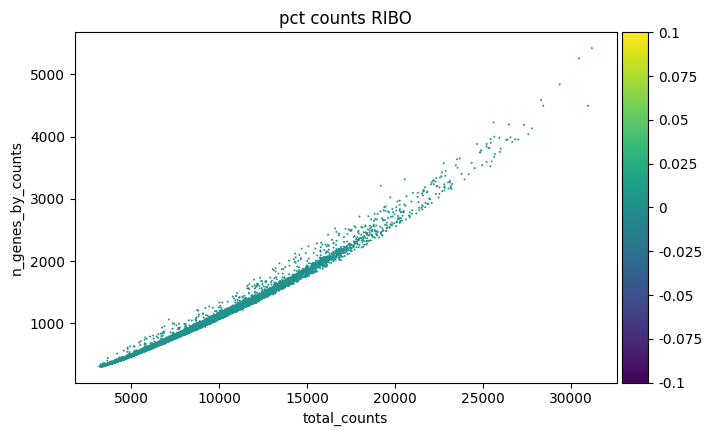

In [14]:
#Visualization of ribosomal genes
sc.pl.scatter(bone_marrow_adata, "total_counts", "n_genes_by_counts", color="pct_counts_RIBO")

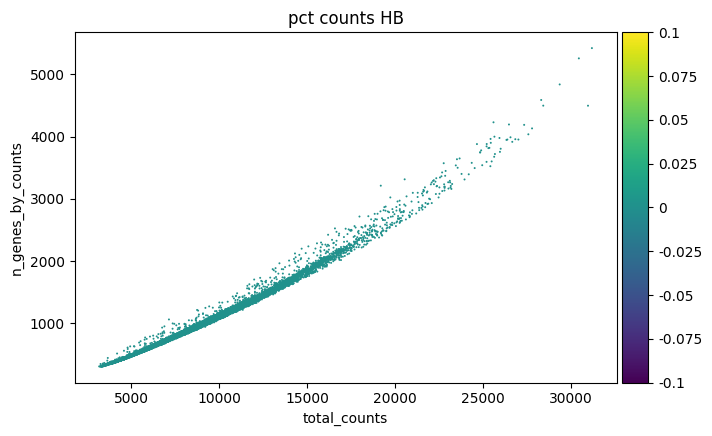

In [15]:
#Visualization of HB genes
sc.pl.scatter(bone_marrow_adata, "total_counts", "n_genes_by_counts", color="pct_counts_HB")

In [13]:
bone_marrow_adata.obs.columns

Index(['disease stage', 'treatment', 'timepoint', 'Dataset', 'sample',
       'disease_original', 'disease_general', 'COVID-19 Condition', 'Lineage',
       'Cell.group', 'Cell.class_reannotated', 'n_genes', 'n_counts',
       'percent_mito', 'tissue_original', 'tissue_ontology_term_id',
       'disease_ontology_term_id', 'donor_id',
       'development_stage_ontology_term_id', 'assay_ontology_term_id',
       'cell_type_ontology_term_id',
       'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id',
       'is_primary_data', 'suspension_type', 'tissue_type', 'assay', 'disease',
       'sex', 'tissue', 'self_reported_ethnicity', 'development_stage',
       'observation_joinid', 'n_genes_by_counts', 'log1p_n_genes_by_counts',
       'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes',
       'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes',
       'pct_counts_in_top_500_genes', 'total_counts_MT',
       'log1p_total_counts_MT', 'pct_counts_MT', 't

In [16]:
!pip install scrublet

import scrublet as scr
import scipy.sparse as sp

sc.pp.scrublet(bone_marrow_adata)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 20.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp312-cp312-linux_x86_64.whl size=551809 sha256=0214ccd6aae5c7d2e4fe135f92dd8d62b3be23f4a97ada28237399cb153b78a6
  Stored in directory: /root/.cache/pip/wheels/db/b9/53/a3b2d1fe1743abadddec6aa541294b24fdbc39d7800bc57311
Successfully built annoy


In [17]:
# 1. Extract Raw Counts for Scrublet
# ---------------------------------------
# Scrublet requires **raw UMI counts** as input.
# If raw counts were stored earlier in .layers["counts"], use them.
# Otherwise fall back to the main data matrix (.X).
if "counts" in bone_marrow_adata.layers:
    counts_matrix = bone_marrow_adata.layers["counts"]
else:
    counts_matrix = bone_marrow_adata.X

# Convert sparse matrix to dense array
# Scrublet cannot operate on sparse matrices.
if sp.issparse(counts_matrix):
    counts_matrix = counts_matrix.toarray()

In [18]:
# 2. Run Scrublet to Detect Doublets
# ---------------------------------------
# Expected doublet rate of ~5–10% is typical for scRNA-seq droplet platforms.
scrub = scr.Scrublet(
    counts_matrix,
    expected_doublet_rate=0.06
)

In [19]:

# Scrublet returns two outputs:
# - doublet_scores: continuous score (how doublet-like each cell is)
# - predicted_doublets: boolean (True = doublet)
doublet_scores, predicted_doublets = scrub.scrub_doublets()

Preprocessing...


/usr/local/lib/python3.12/dist-packages/scrublet/helper_functions.py:239: RuntimeWarning: invalid value encountered in log
  gLog = lambda input: np.log(input[1] * np.exp(-input[0]) + input[2])
/usr/local/lib/python3.12/dist-packages/scrublet/helper_functions.py:252: RuntimeWarning: invalid value encountered in sqrt
  CV_input = np.sqrt(b);


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.70
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 9.5%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 0.6%
Elapsed time: 71.7 seconds


In [20]:
# Store doublet predictions back into AnnData metadata (.obs)
bone_marrow_adata.obs["doublet_score"] = doublet_scores
bone_marrow_adata.obs["predicted_doublet"] = predicted_doublets

In [21]:
# Quick look at first few rows
bone_marrow_adata.obs[["doublet_score", "predicted_doublet"]].head()


,doublet_score,predicted_doublet
index,,
Guo-AAACCTGAGAGCTTCT-2,0.016600,False
Guo-AAACCTGAGAGGTTGC-7,0.028139,False
Guo-AAACCTGAGATACACA-3,0.124144,False
Guo-AAACCTGAGCGATTCT-1,0.042846,False
Guo-AAACCTGAGTGAAGAG-3,0.044715,False


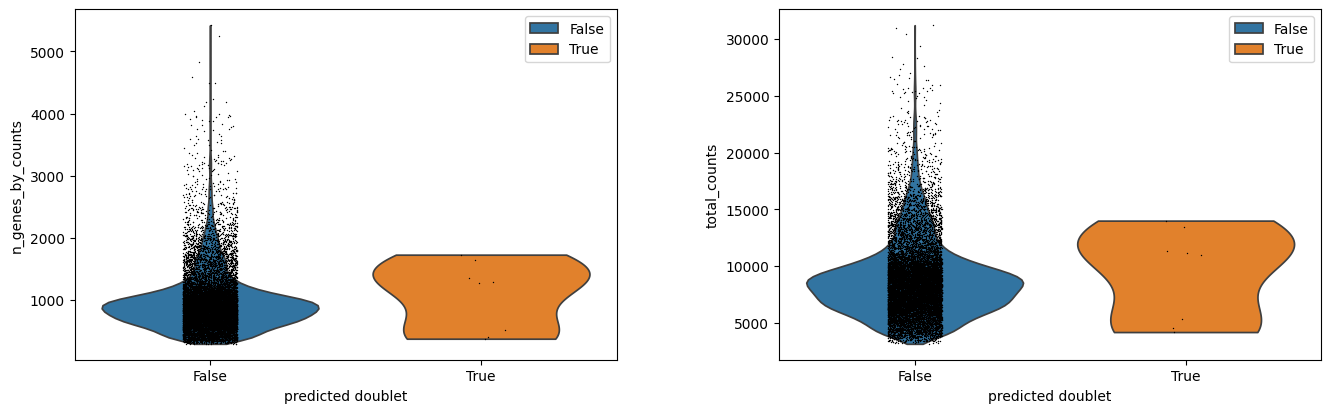

In [22]:
# Visualize doublets vs singlets across QC metrics
# Higher total counts and gene counts often indicate doublets.
bone_marrow_adata.obs['predicted_doublet'] = bone_marrow_adata.obs['predicted_doublet'].astype('category')
sc.pl.violin(
    bone_marrow_adata,
    ["n_genes_by_counts", "total_counts"],
    groupby="predicted_doublet",
    multi_panel=True
)

Removed 8 predicted doublets; remaining 14775 cells.


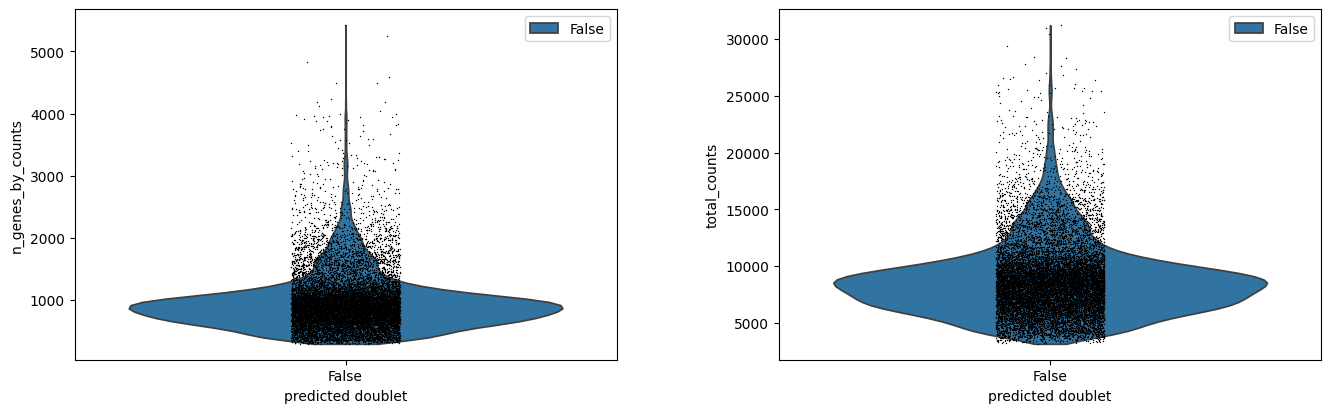

In [23]:
# 3. Filter Out Predicted Doublets
# ---------------------------------------
before = bone_marrow_adata.n_obs

# Keep only cells predicted as singlets (False)
bone_marrow_adata = bone_marrow_adata[bone_marrow_adata.obs["predicted_doublet"] == False].copy()

after = bone_marrow_adata.n_obs
print(f"Removed {before - after} predicted doublets; remaining {after} cells.")

# Check QC distribution again after removal
sc.pl.violin(
    bone_marrow_adata,
    ["n_genes_by_counts", "total_counts"],
    groupby="predicted_doublet",
    multi_panel=True
)

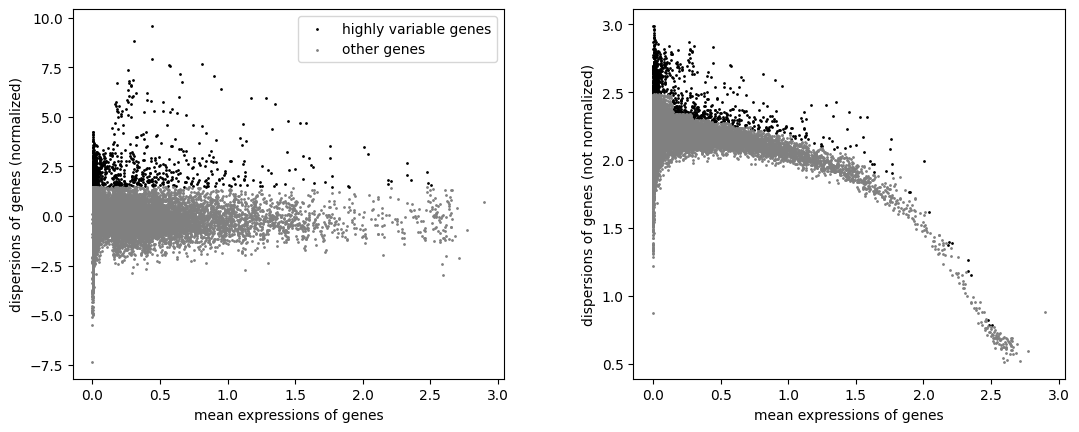

In [24]:
# 4. Normalization and Log-Transformation
# ---------------------------------------
# Save raw counts for later use (important for differential expression)
bone_marrow_adata.layers["counts"] = bone_marrow_adata.X.copy()

# Normalize library size so every cell has similar total counts
sc.pp.normalize_total(bone_marrow_adata)

# Apply log1p (log(1+x)) to stabilize variance across genes
sc.pp.log1p(bone_marrow_adata)

# Select top 1000 most variable genes
# These drive clustering and dimensionality reduction.
sc.pp.highly_variable_genes(bone_marrow_adata, n_top_genes=1000)
sc.pl.highly_variable_genes(bone_marrow_adata)

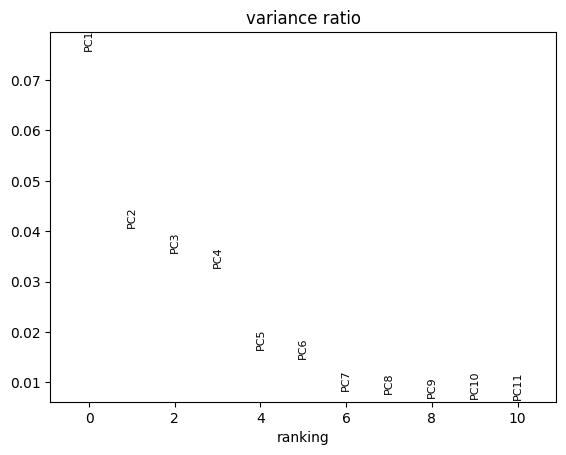

In [25]:
# 5. PCA, Neighbor Graph, UMAP, Leiden Clustering
# ---------------------------------------
# PCA reduces noise and dimensionality
sc.tl.pca(bone_marrow_adata)
sc.pl.pca_variance_ratio(bone_marrow_adata, n_pcs=10)

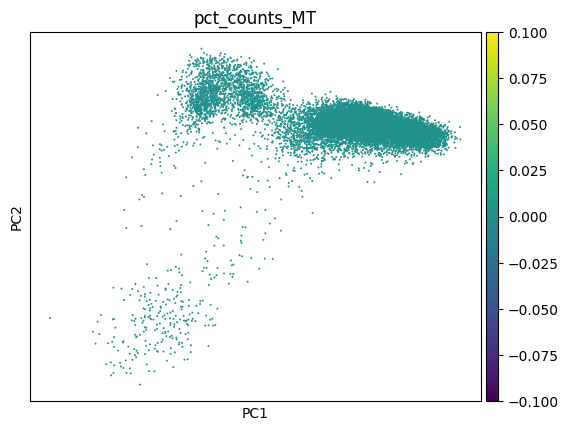

In [26]:
# Visual check for mitochondrial % in PCA space
sc.pl.pca(bone_marrow_adata, color=["pct_counts_MT"])

In [27]:
# Build nearest-neighbor graph (required for UMAP + Leiden)
sc.pp.neighbors(bone_marrow_adata)


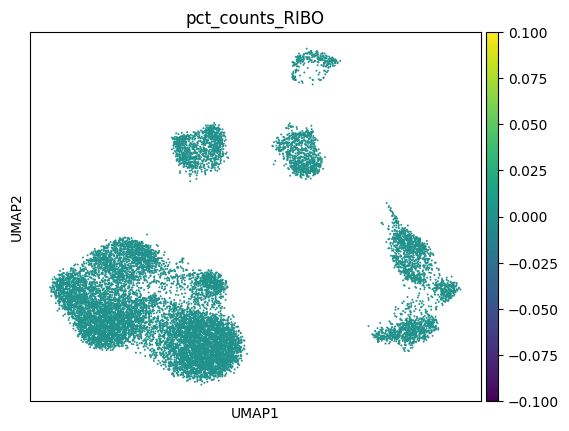

In [28]:
# UMAP visualization
sc.tl.umap(bone_marrow_adata)
sc.pl.umap(bone_marrow_adata, color=["pct_counts_RIBO"], size=8)

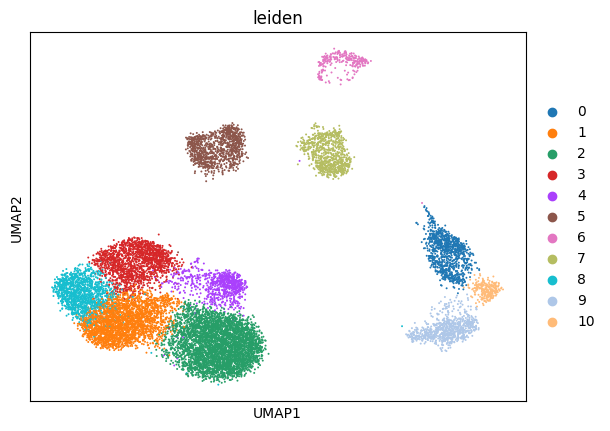

In [29]:
# Cluster cells using Leiden community detection
sc.tl.leiden(bone_marrow_adata, flavor="igraph", n_iterations=2)
sc.pl.umap(bone_marrow_adata, color=["leiden"], size=8)

In [83]:
# Multiple resolutions = coarse vs fine clustering structure
sc.tl.leiden(bone_marrow_adata, key_added="leiden_res0_02", resolution=0.02)
sc.tl.leiden(bone_marrow_adata, key_added="leiden_res0_5", resolution=0.5)
sc.tl.leiden(bone_marrow_adata, key_added="leiden_res2", resolution=2)

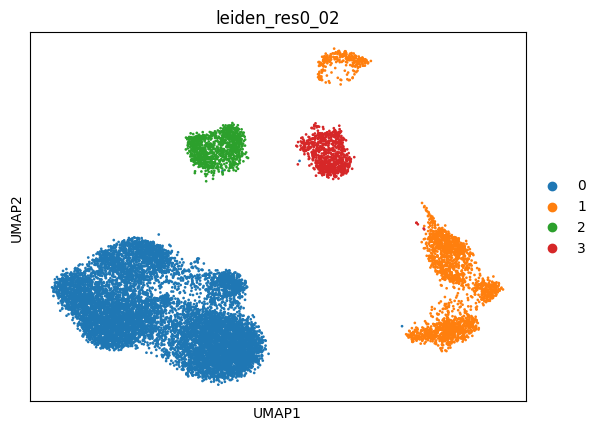

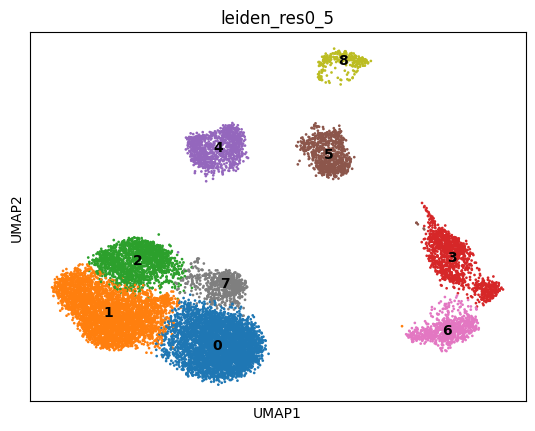

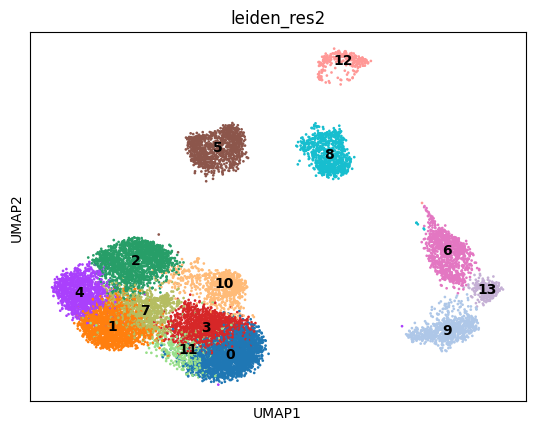

In [31]:
sc.pl.umap(bone_marrow_adata, color=["leiden_res0_02"], size=15)
sc.pl.umap(bone_marrow_adata, color=["leiden_res0_5"], size=15, legend_loc="on data")
sc.pl.umap(bone_marrow_adata, color=["leiden_res2"], size=15, legend_loc="on data")

In [35]:
# 6. Prepare Gene Names for decoupler
# ---------------------------------------
# decoupler expects proper gene symbols in var_names
bone_marrow_adata.var_names = pd.Index(bone_marrow_adata.var['feature_name'].astype(str))
bone_marrow_adata.var_names_make_unique()

In [62]:
!wget wget -O result.txt 'http://www.ensembl.org/biomart/martservice?query=<?xml version="1.0" encoding="UTF-8"?><!DOCTYPE Query><Query  virtualSchemaName = "default" formatter = "CSV" header = "0" uniqueRows = "0" count = "" datasetConfigVersion = "0.6" ><Dataset name = "hsapiens_gene_ensembl" interface = "default" ><Attribute name = "ensembl_gene_id" /><Attribute name = "external_gene_name" /></Dataset></Query>'


#this downloads the table of genes directly from ensemble

--2025-12-02 17:37:49--  http://wget/
Resolving wget (wget)... failed: Name or service not known.
wget: unable to resolve host address ‘wget’
--2025-12-02 17:37:49--  http://www.ensembl.org/biomart/martservice?query=%3C?xml%20version=%221.0%22%20encoding=%22UTF-8%22?%3E%3C!DOCTYPE%20Query%3E%3CQuery%20%20virtualSchemaName%20=%20%22default%22%20formatter%20=%20%22CSV%22%20header%20=%20%220%22%20uniqueRows%20=%20%220%22%20count%20=%20%22%22%20datasetConfigVersion%20=%20%220.6%22%20%3E%3CDataset%20name%20=%20%22hsapiens_gene_ensembl%22%20interface%20=%20%22default%22%20%3E%3CAttribute%20name%20=%20%22ensembl_gene_id%22%20/%3E%3CAttribute%20name%20=%20%22external_gene_name%22%20/%3E%3C/Dataset%3E%3C/Query%3E
Resolving www.ensembl.org (www.ensembl.org)... 193.62.193.83
Connecting to www.ensembl.org (www.ensembl.org)|193.62.193.83|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘result.txt’

result.txt              [      <=>      

In [65]:
import pandas as pd

ensembl_var = pd.read_csv('/content/result.txt', header = None)

ensembl_var.columns = ['ensembl_gene_id', 'gene_name']

ensembl_var.head(3)

,ensembl_gene_id,gene_name
0,ENSG00000210049,MT-TF
1,ENSG00000211459,MT-RNR1
2,ENSG00000210077,MT-TV


In [68]:
# Query Omnipath and get PanglaoDB
markers = dc.op.resource(name="PanglaoDB", organism="human")

# Keep canonical cell type markers alone
#markers = markers[markers["canonical_marker"]]

# Remove duplicated entries
markers = markers[~markers.duplicated(["cell_type", "genesymbol"])]

#Format because dc only accepts cell_type and genesymbol

markers = markers.rename(columns={"cell_type": "source", "genesymbol": "target"})
markers = markers[["source", "target"]]


markers.head()

,source,target
,,
0,Hepatocytes,A1CF
1,Germ cells,A2APA5
2,Bergmann glia,A2M
3,Mast cells,A3FIN4
4,Mast cells,A4GALT


In [72]:
#correct target to ensemble
markers = markers.merge(ensembl_var, left_on="target", right_on="gene_name", how="left")
markers = markers.drop(columns=["target"])
# Remove duplicated entries
markers = markers[~markers.duplicated(["source", "ensembl_gene_id"])]

#Format because dc only accepts cell_type and genesymbol
markers = markers.rename(columns={"source": "source", "ensembl_gene_id": "target"})

markers = markers[["source", "target"]]
markers = markers.dropna()

markers.head()

,source,target
0,Hepatocytes,ENSG00000148584
2,Bergmann glia,ENSG00000175899
4,Mast cells,ENSG00000128274
6,Interneurons,ENSG00000115977
7,Neurons,ENSG00000115977


In [73]:
# 7. Cell-Type Scoring Using decoupler + PanglaoDB
# ---------------------------------------
# decoupler.mt.ulm = univariate linear model
# It scores each cell for how strongly it expresses marker genes for each cell type.
dc.mt.ulm(data=bone_marrow_adata, net=markers, tmin=3)

# Get resulting scores matrix (cells × cell types)
score = dc.pp.get_obsm(bone_marrow_adata, key="score_ulm")

In [74]:
# Load marker genes from PanglaoDB using decoupler's built-in function
markers = dc.get_resource('PanglaoDB')

AttributeError: module 'decoupler' has no attribute 'get_resource'

In [75]:
# Visualize how cell-type scores distribute across clusters
sc.pl.dotplot(
    score,
    var_names=score.var_names.tolist(),
    groupby='leiden_res0_5',
    cmap='RdBu_r',
    dendrogram=True,
    standard_scale='var'
)

ValueError: groupby has to be a valid observation. Given leiden_res0_5, is not in observations: ['disease stage', 'treatment', 'timepoint', 'Dataset', 'sample', 'disease_original', 'disease_general', 'COVID-19 Condition', 'Lineage', 'Cell.group', 'Cell.class_reannotated', 'n_genes', 'n_counts', 'percent_mito', 'tissue_original', 'tissue_ontology_term_id', 'disease_ontology_term_id', 'donor_id', 'development_stage_ontology_term_id', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'suspension_type', 'tissue_type', 'assay', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid']  or index name "index"

In [84]:
# 8. Cluster Annotation Based on Enriched Cell-Type Signatures
# ---------------------------------------
# Copy leiden_res2 from bone_marrow_adata.obs to score.obs for grouping
score.obs['leiden_res2'] = bone_marrow_adata.obs['leiden_res2']

# rankby_group identifies which signatures are enriched in each cluster
rank_df = dc.tl.rankby_group(
    score,
    groupby="leiden_res2",
    reference="rest",
    method="t-test_overestim_var",
)

In [85]:
# Keep only markers enriched (positive stats)
rank_df = rank_df[rank_df["stat"] > 0]


In [86]:
# Assign each cluster its highest-scoring signature
cluster_auto = (
    rank_df.sort_values(["group", "stat"], ascending=[True, False])
    .groupby("group").head(1)
    .set_index("group")["name"]
    .to_dict()
)


/tmp/ipython-input-342469016.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("group").head(1)


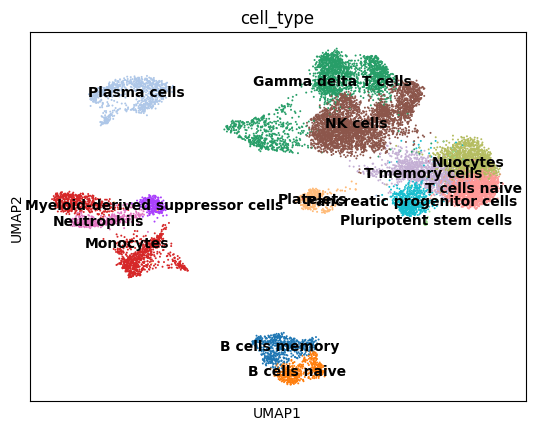

In [87]:
# Map cluster → cell type
bone_marrow_adata.obs["cell_type"] = (
    bone_marrow_adata.obs["leiden_res2"].map(cluster_auto)
).astype("category")

sc.pl.umap(bone_marrow_adata, color=["cell_type"], legend_loc="on data")

In [88]:
# 9. Extract Marker Genes for Visual QC
# ---------------------------------------
# Filter markers to those present in the dataset
available_genes = set(bone_marrow_adata.var_names)

In [89]:

neutro_markers = markers[markers['source'] == 'Neutrophils']['target']
neutro_markers = neutro_markers[neutro_markers.isin(available_genes)]


In [90]:
macro_markers = markers[markers['source'] == 'Macrophages']['target']
macro_markers = macro_markers[macro_markers.isin(available_genes)]

In [91]:
den_cells_markers = markers[markers['source'] == 'Dendritic cells']['target']
den_cells_markers = den_cells_markers[den_cells_markers.isin(available_genes)]

In [92]:
kup_cells_markers = markers[markers['source'] == 'Kupffer cells']['target']
kup_cells_markers = kup_cells_markers[kup_cells_markers.isin(available_genes)]

In [93]:
micro_markers = markers[markers['source'] == 'Microglia']['target']
micro_markers = micro_markers[micro_markers.isin(available_genes)]

In [94]:
# Create dictionary for visualization
marker_genes_dict = {
    "Neutrophils": neutro_markers.head().tolist(),
    "Macrophages": macro_markers.head().tolist(),
    "Dendritic cells": den_cells_markers.head().tolist(),
    "Kupffer cells": kup_cells_markers.head().tolist(),
    "Microglia": micro_markers.head().tolist()
}

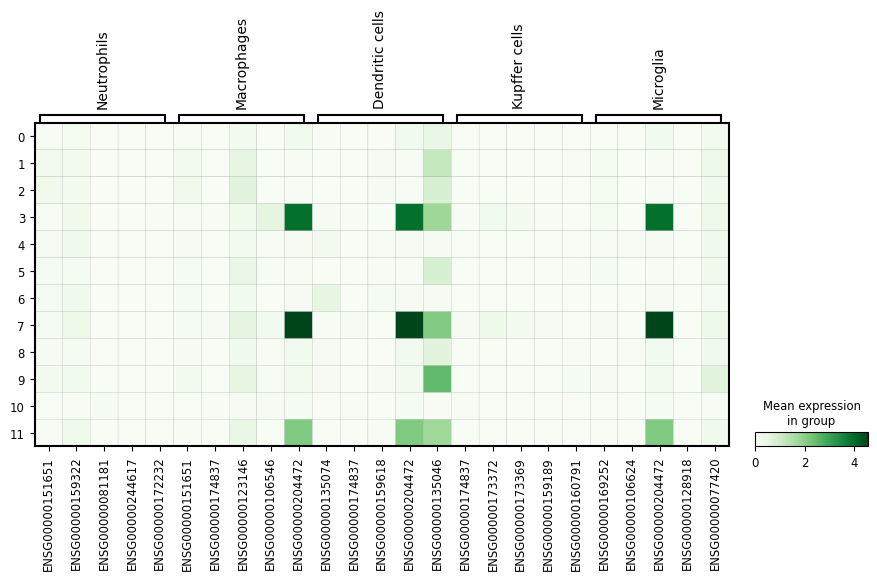

In [95]:
# 10. Visualize Marker Expression by Cluster
# ---------------------------------------
sc.tl.dendrogram(bone_marrow_adata, groupby="leiden_res0_5")
sc.pl.matrixplot(bone_marrow_adata, marker_genes_dict, "leiden_res0_5", cmap="Greens")

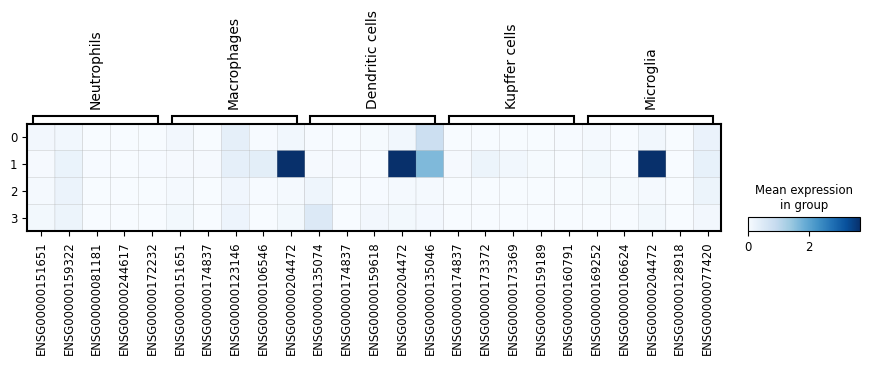

In [96]:
sc.tl.dendrogram(bone_marrow_adata, groupby="leiden_res0_02")
sc.pl.matrixplot(bone_marrow_adata, marker_genes_dict, "leiden_res0_02", cmap="Blues")

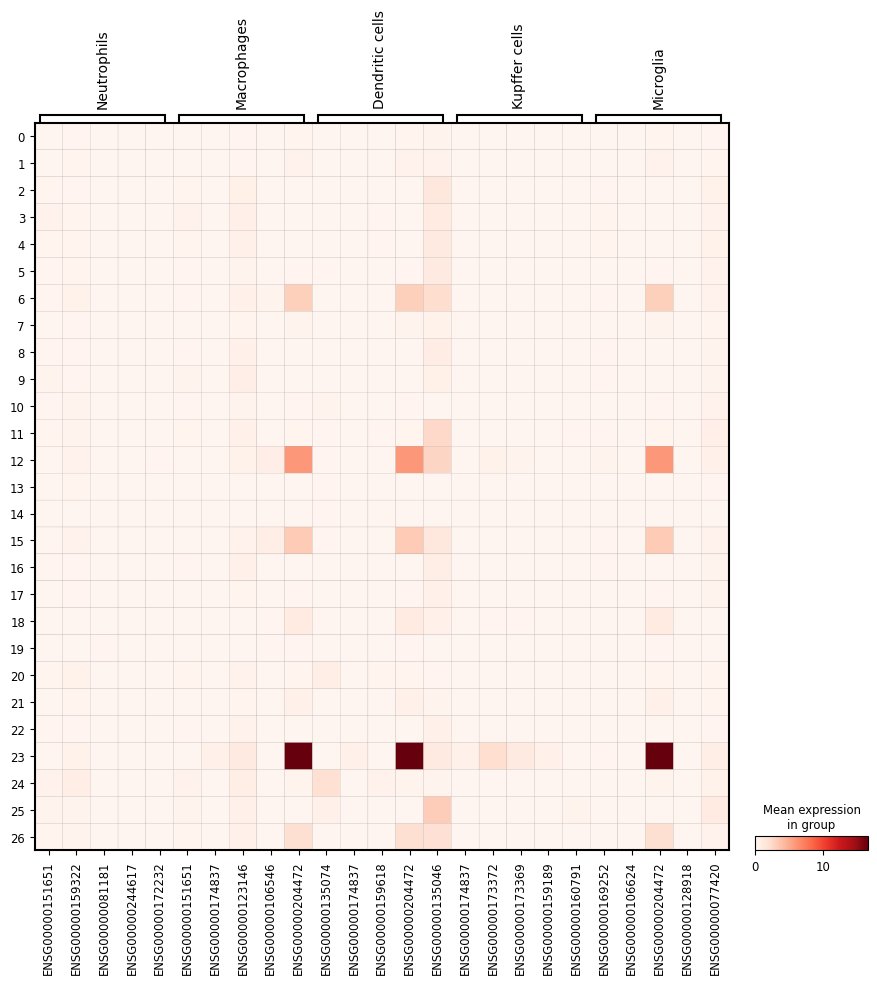

In [97]:
sc.tl.dendrogram(bone_marrow_adata, groupby="leiden_res2")
sc.pl.matrixplot(bone_marrow_adata, marker_genes_dict, "leiden_res2", cmap="Reds")


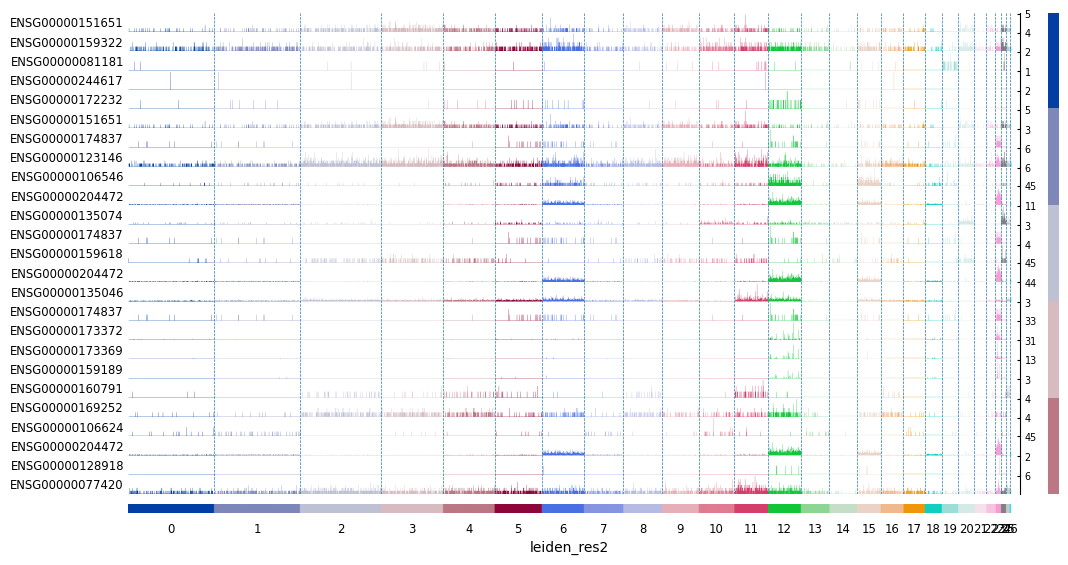

In [99]:
# Tracksplot is useful for patterns across clusters
sc.pl.tracksplot(bone_marrow_adata, marker_genes_dict, groupby="leiden_res2")

In [98]:
# 11. Final Cell-Type Composition Summary
# ---------------------------------------
bone_marrow_adata.obs["cell_type"].value_counts(normalize=True).sort_values(ascending=False)

,proportion
cell_type,
NK cells,0.229926
Gamma delta T cells,0.150375
T cells naive,0.110871
Nuocytes,0.097409
Monocytes,0.090983
T memory cells,0.081851
Plasma cells,0.055334
Pancreatic progenitor cells,0.044714
B cells memory,0.040384


In [78]:
sc.pp.neighbors(bone_marrow_adata)
sc.tl.leiden(bone_marrow_adata, key_added="leiden_res0_5", resolution=0.5)
score.obs['leiden_res0_5'] = bone_marrow_adata.obs['leiden_res0_5']
print("The 'leiden_res0_5' column has been copied from bone_marrow_adata.obs to score.obs.")

The 'leiden_res0_5' column has been copied from bone_marrow_adata.obs to score.obs.


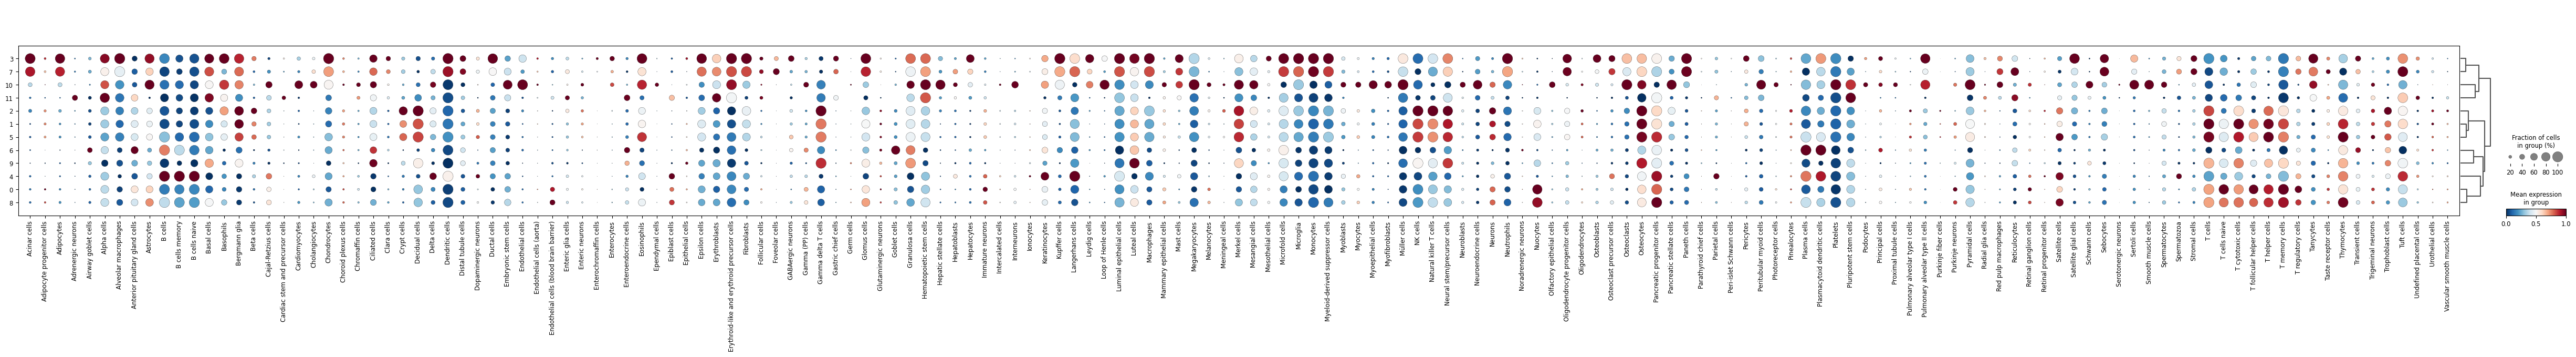

In [80]:
# Visualize how cell-type scores distribute across clusters
sc.pl.dotplot(
    score,
    var_names=score.var_names.tolist(),
    groupby='leiden_res0_5',
    cmap='RdBu_r',
    dendrogram=True,
    standard_scale='var'
)
